In [1]:
from __future__ import division
from IIRrational.utilities.ipynb_lazy import *

Populating the interactive namespace from numpy and matplotlib


# Random Filter fit with comparison

## Show stage-1 Rational Disc Fit
Here is the preliminary fit on a reduced-nyquist disc

The poles and zeros are shown on the full disc. Note that unstable poles are allowed _on the real line_ as these are removed by analytic surgery during the nyquist shift 

(direct = 4.164e+00, Psvd= 4.164e+00, Zsvd= 4.164e+00)
LINEAR Final Residuals:  3.95445037567
(direct = 3.930e+00, Psvd= 3.930e+00, Zsvd= 3.930e+00)
LINEAR Final Residuals:  3.93098246203
Using last (reduced)! 20


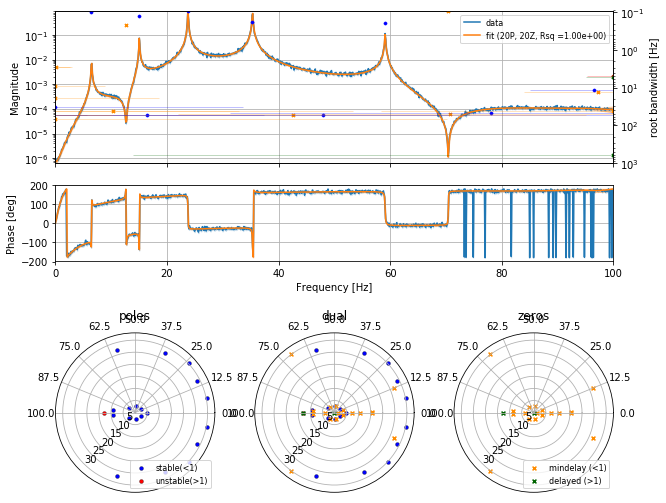

In [6]:
dat = IIRrational_data('rand10_lin1k', set_num = 5)
out = v1.rational_disc_fit(
    dat,
)
ax = plot_fitter_flag(out)

## With nyquist shift

The data detunes from being a great fit

(direct = 4.164e+00, Psvd= 4.164e+00, Zsvd= 4.164e+00)
LINEAR Final Residuals:  3.95445037567
(direct = 3.930e+00, Psvd= 3.930e+00, Zsvd= 3.930e+00)
LINEAR Final Residuals:  3.93098246203
Using last (reduced)! 20
Cleared  pole (-1.04899302868+0j)
Cleared  zero (-7.22335881797+0j)
Cleared  zero (-1.05198172682+0j)
Cleared  zero (-0.584295509961+0j)


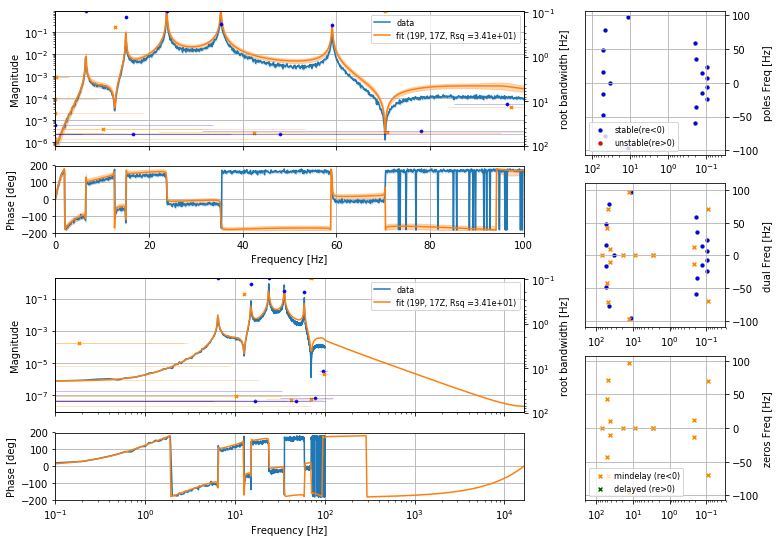

In [7]:
dat = IIRrational_data('rand10_lin1k', set_num = 5)
out = v1.rational_disc_fit(
    dat,
    nyquist_final_Hz = 16384,
)
ax = plot_fitter_flag(out)

In [8]:
%%time

out = v1.data2filter(
    dat,
    delay_s = None,
)

(direct = 4.164e+00, Psvd= 4.164e+00, Zsvd= 4.164e+00)
LINEAR Final Residuals:  3.95445037567
(direct = 3.930e+00, Psvd= 3.930e+00, Zsvd= 3.930e+00)
LINEAR Final Residuals:  3.93098246203
Using last (reduced)! 20
Cleared  pole (-1.04899302868+0j)
Cleared  zero (-7.22335881797+0j)
Cleared  zero (-1.05198172682+0j)
Cleared  zero (-0.584295509961+0j)
Initial Order: (Z= 17, P= 19, Z-P= -2)
TRIPLETS (rat = 1.0010150038962191, pre = 0.9734729303474599, mid = 0.9734729249578383, post = 0.9734722105759255
N:  2
RATIO:  10.9002733839
fit NOT improved from pair at 13.8397945578
RATIO:  18.3818734556
fit NOT improved from pair at 9.56094083217
RATIO:  10.7017576506
fit NOT improved from pair at 18.2046398213
RATIO:  1.03476207996
fit NOT improved from pair at 64.7360498735
[0.96102176342334822] zeros
[(0.98751653189313626+0.0050603760550500913j), (0.98751653189313626-0.0050603760550500913j)] zeros
[0.98726211674090025] poles
[(0.97815059543903571+3.9610796052692903e-05j), (0.97815059543903571-3.9

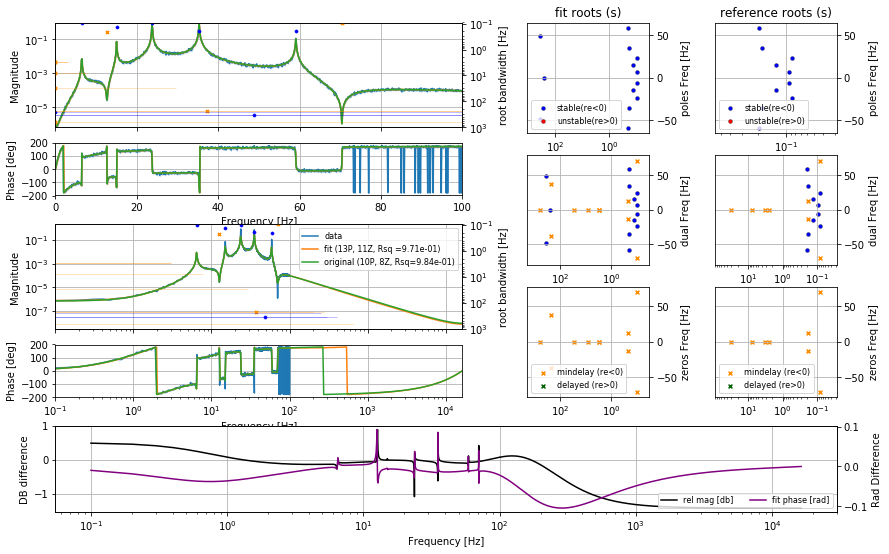

In [10]:
ax = plot_fitter_flag_compare(out.fitter, dat.fitter)

In [12]:
out.digest_write(
    folder = 'random',
    clear_plots = True,
    ipy_display = True,
    MP_workers = 1,
)

REMOVING:  random/plot-main
REMOVING:  random/plot-1
PLOTTING:  random/plot-1-1
PLOTTING:  random/plot-1-2
PLOTTING:  random/plot-1-3
REMOVING:  random/plot-1-4
PLOTTING:  random/plot-1-5
PLOTTING:  random/plot-1-6
PLOTTING:  random/plot-1-7
PLOTTING:  random/plot-2
PLOTTING:  random/plot-3
REMOVING:  random/plot-4
PLOTTING:  random/plot-4-1
PLOTTING:  random/plot-4-2
REMOVING:  random/plot-5
REMOVING:  random/plot-6
REMOVING:  random/plot-7
REMOVING:  random/plot-8
REMOVING:  random/plot-9
PLOTTING:  random/plot-10


# fit_sequence version 1

> `v1.fit_sequence`

Version 1 smart fitter in IIRrational library. Uses SVD method with high order over-fitting, then switches to nonlinear fits with heuristics to remove poles and zeros down to a reasonable system order.

## `1` initial

### `1.1` initial_direct

> `fit_poles, fit_zeros`

initial guess without SVD technique

![](random/plot-1-1.png)

### `1.2` initial_poles

> `fit_poles_mod_zeros`

Performs the SVD for a rough initial guess

![](random/plot-1-2.png)

### `1.3` initial_zeros

> `fit_poles_mod_zeros`

Performs the SVD for a rough initial guess

![](random/plot-1-3.png)

### `1.4` choose zeros

> `if`

Chose the zeros SVD fitter as it had the smaller residual of 4.04e+00 vs. 4.46e+00 for the poles

### `1.5` seq_iter_3

> `RationalDiscFilter.fit_poles, RationalDiscFilter.fit_zeros`

First iterations, enforcing stabilized poles residual of 3.95e+00

![](random/plot-1-5.png)

### `1.6` seq_iter_4

> `RationalDiscFilter.fit_poles, RationalDiscFilter.fit_zeros`

First iterations, enforcing stabilized poles residual of 3.95e+00

![](random/plot-1-6.png)

### `1.7` Final

> `SVD_method`

create initial guess of fit for data, followed by several iterative fits
(see reference ???).
   * It is a linear method, finding global optimum (nonlocal). This makes it get stuck if systematics are bad. To prevent this,
it requires gratuitous overfitting to reliably get good fits.
   * It requires a nyquist frequency that is very low, near the last data point. This can cause artifacts due to phasing discontinuity near the nyquist.
   * The provided nyquist frequency is shifted up at the end, removing the real poles/zeros that are typically due to phasing discontinuity

![](random/plot-1-7.png)

## `2` nonlinear pre-reduce and optimize

> `MultiReprFilterZ.optimize`

initial conservative order reduction (for speed), followed by a nonlinear optimization.

![](random/plot-2.png)

## `3` optimize nonlinear after bandwidth limiting

> `MultiReprFilterZ.optimize`

ths limited in the nonlinear representation to half of the local average the frequency spacing.
Nonlinear optimization then applied.

![](random/plot-3.png)

## `4` order_reduce 1

### `4.1` duals_ID_1

> `MultiReprFilterZ.optimize`

ID Pairs for order reduction

![](random/plot-4-1.png)

### `4.2` duals_ID_2

> `MultiReprFilterZ.optimize`

ID Pairs for order reduction

![](random/plot-4-2.png)

## `5` remove_negroots

## `6` remove_weakroots

## `7` remove_negroots

## `8` remove_negroots

## `9` flip mindelay

## `10` final

> `MultiReprFilterZ.optimize`

ing nonlinear parameterizations,
TODO: describe as used

![](random/plot-10.png)

